In [4]:
pip install tensorflow keras scikit-learn matplotlib pandas


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


Dataset Dimensions: (1599, 12)
Null Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable para

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


35/35 [==============================] - 0s 6ms/step - loss: -20.9980 - accuracy: 0.0000e+00 - val_loss: -36.5173 - val_accuracy: 0.0000e+00
Epoch 3/100
35/35 [==============================] - 0s 6ms/step - loss: -61.1316 - accuracy: 0.0000e+00 - val_loss: -96.8193 - val_accuracy: 0.0000e+00
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: -145.5309 - accuracy: 0.0000e+00 - val_loss: -216.6630 - val_accuracy: 0.0000e+00
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: -300.3165 - accuracy: 0.0000e+00 - val_loss: -419.8397 - val_accuracy: 0.0000e+00
Epoch 6/100
35/35 [==============================] - 0s 5ms/step - loss: -548.0355 - accuracy: 0.0000e+00 - val_loss: -734.7792 - val_accuracy: 0.0000e+00
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: -916.1950 - accuracy: 0.0000e+00 - val_loss: -1189.4210 - val_accuracy: 0.0000e+00
Epoch 8/100
35/35 [==============================] - 0s 5ms/step - loss: -1432.9528 -

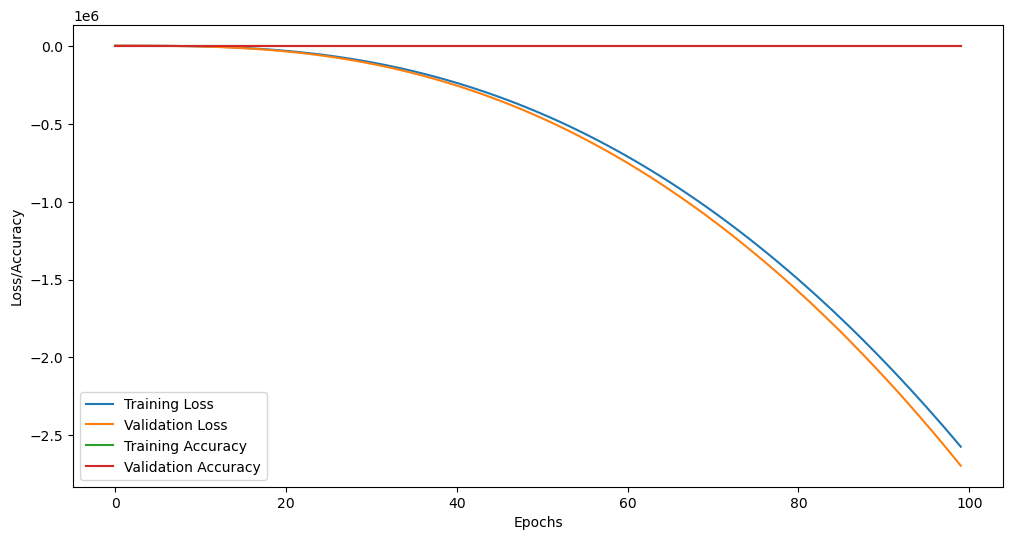

8/8 [==============================] - 0s 2ms/step - loss: -2720733.7500 - accuracy: 0.0000e+00
Test Loss: -2720733.75, Test Accuracy: 0.0


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
import datetime

# Q1: Install and load the latest versions of TensorFlow and Keras.
# keras_version = tf.keras.__version__
# print("TensorFlow Version:", tf.__version__)
# print("Keras Version:", keras_version)

# Q2: Load the Wine Quality dataset and explore its dimensions.
wine_data = pd.read_csv("datasets/winequality-red.csv")
print("Dataset Dimensions:", wine_data.shape)

# Q3: Check for null values, identify categorical variables, and encode them.
print("Null Values:\n", wine_data.isnull().sum())
categorical_columns = wine_data.select_dtypes(include=['object']).columns
wine_data = pd.get_dummies(wine_data, columns=categorical_columns, drop_first=True)

# Q4: Separate the features and target variables from the dataframe.
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Q5: Perform a train-test split and divide the data into training, validation, and test datasets.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Q6: Perform scaling on the dataset.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Q7: Create at least 2 hidden layers and an output layer for the binary categorical variables.
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Q8: Create a Sequential model and add all the layers to it.

# Q9: Implement a TensorBoard callback to visualize and monitor the model's training process.
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Q10: Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Q11: Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.
model_checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

# Q12: Print the model summary.
model.summary()

# Q13: Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Q15: Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback])

# Q16: Get the model's parameters.
model_params = model.count_params()
print("Model Parameters:", model_params)

# Q17: Store the model's training history as a Pandas DataFrame.
history_df = pd.DataFrame(history.history)

# Q18: Plot the model's training history.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

# Q19: Evaluate the model's performance using the test data.
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
